# Feature Selection Techniques
> 1. Univariate Selection
2. Feature Importance - ExtraTreeClassifier
3. Correlation
4. Mutual information or Infirmation Gain


> ## Import Required Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier

> ## Import the Dataset

In [7]:
df = pd.read_csv('./mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


> ## Extracting Dependent and Independent Features

In [12]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [13]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [14]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

> ## Splitting the data into Testing and Training sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> ## 1. Univariate Selection

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

> ## Apply `SelectKBest` algorithm

In [17]:
df.shape

(2000, 21)

In [19]:
ordered_rank_features = SelectKBest(chi2, k=20)
ordered_feature = ordered_rank_features.fit(X_train, y_train)
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7efc995343b0>)

In [20]:
ordered_feature.scores_

array([1.12674856e+04, 4.47725426e-01, 2.22877430e-01, 4.68799752e-01,
       8.59108842e+00, 1.70357389e+00, 1.00023107e+02, 6.12305526e-01,
       9.04549363e+01, 1.17386839e+01, 7.85512127e+00, 1.07990739e+04,
       5.90828816e+03, 6.39172703e+05, 3.41159483e+00, 5.67483723e+00,
       3.25887418e+00, 1.95440435e-01, 2.77779407e+00, 4.84113840e-01])

In [21]:
ordered_features = pd.Series(ordered_feature.scores_)

In [22]:
ordered_features

0      11267.485636
1          0.447725
2          0.222877
3          0.468800
4          8.591088
5          1.703574
6        100.023107
7          0.612306
8         90.454936
9         11.738684
10         7.855121
11     10799.073858
12      5908.288157
13    639172.702848
14         3.411595
15         5.674837
16         3.258874
17         0.195440
18         2.777794
19         0.484114
dtype: float64

In [24]:
ordered_features.index = X_train.columns
ordered_features.sort_values(ascending=False)

ram              639172.702848
battery_power     11267.485636
px_height         10799.073858
px_width           5908.288157
int_memory          100.023107
mobile_wt            90.454936
n_cores              11.738684
fc                    8.591088
pc                    7.855121
sc_w                  5.674837
sc_h                  3.411595
talk_time             3.258874
touch_screen          2.777794
four_g                1.703574
m_dep                 0.612306
wifi                  0.484114
dual_sim              0.468800
blue                  0.447725
clock_speed           0.222877
three_g               0.195440
dtype: float64

In [26]:
ordered_features = pd.DataFrame(ordered_feature.scores_, index=X_train.columns, columns=['score'])
ordered_features

,score
battery_power,11267.485636
blue,0.447725
clock_speed,0.222877
dual_sim,0.468800
fc,8.591088
four_g,1.703574
int_memory,100.023107
m_dep,0.612306
mobile_wt,90.454936
n_cores,11.738684


In [27]:
scores_df = ordered_features.reset_index()
scores_df

,index,score
0,battery_power,11267.485636
1,blue,0.447725
2,clock_speed,0.222877
3,dual_sim,0.468800
4,fc,8.591088
5,four_g,1.703574
6,int_memory,100.023107
7,m_dep,0.612306
8,mobile_wt,90.454936
9,n_cores,11.738684


In [31]:
scores_df.rename(columns={'index': 'feature'}, inplace=True)
scores_df

,feature,score
0,battery_power,11267.485636
1,blue,0.447725
2,clock_speed,0.222877
3,dual_sim,0.468800
4,fc,8.591088
5,four_g,1.703574
6,int_memory,100.023107
7,m_dep,0.612306
8,mobile_wt,90.454936
9,n_cores,11.738684


In [33]:
scores_df.nlargest(10, 'score')

,feature,score
13,ram,639172.702848
0,battery_power,11267.485636
11,px_height,10799.073858
12,px_width,5908.288157
6,int_memory,100.023107
8,mobile_wt,90.454936
9,n_cores,11.738684
4,fc,8.591088
10,pc,7.855121
15,sc_w,5.674837


> ## 2. Feature Importance - ExtraTreeClassifier
This technique gives you a score for each feature of your data, the higher the score mor relevant it is

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [36]:
print(model.feature_importances_)

[0.06275754 0.02151155 0.03289659 0.01962752 0.03339875 0.01716537
 0.0353335  0.03398558 0.03711133 0.03508876 0.03461627 0.04823558
 0.04989777 0.38072795 0.03485164 0.03307269 0.0360487  0.0153994
 0.0169502  0.02132331]


In [38]:
ranked_features = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
ranked_features

ram              0.380728
battery_power    0.062758
px_width         0.049898
px_height        0.048236
mobile_wt        0.037111
talk_time        0.036049
int_memory       0.035333
n_cores          0.035089
sc_h             0.034852
pc               0.034616
m_dep            0.033986
fc               0.033399
sc_w             0.033073
clock_speed      0.032897
blue             0.021512
wifi             0.021323
dual_sim         0.019628
four_g           0.017165
touch_screen     0.016950
three_g          0.015399
dtype: float64

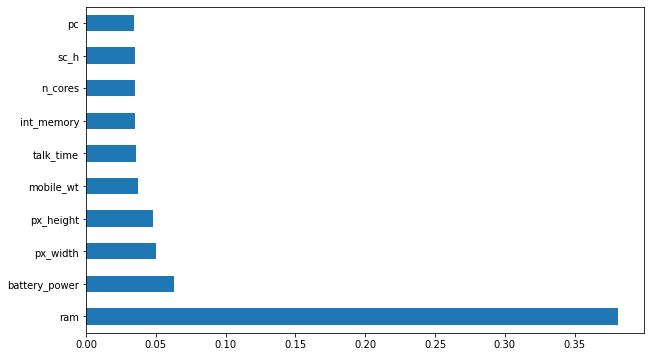

In [41]:
ranked_features.nlargest(10).plot.barh(figsize=(10, 6))

> ## 3. Correlation

In [43]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


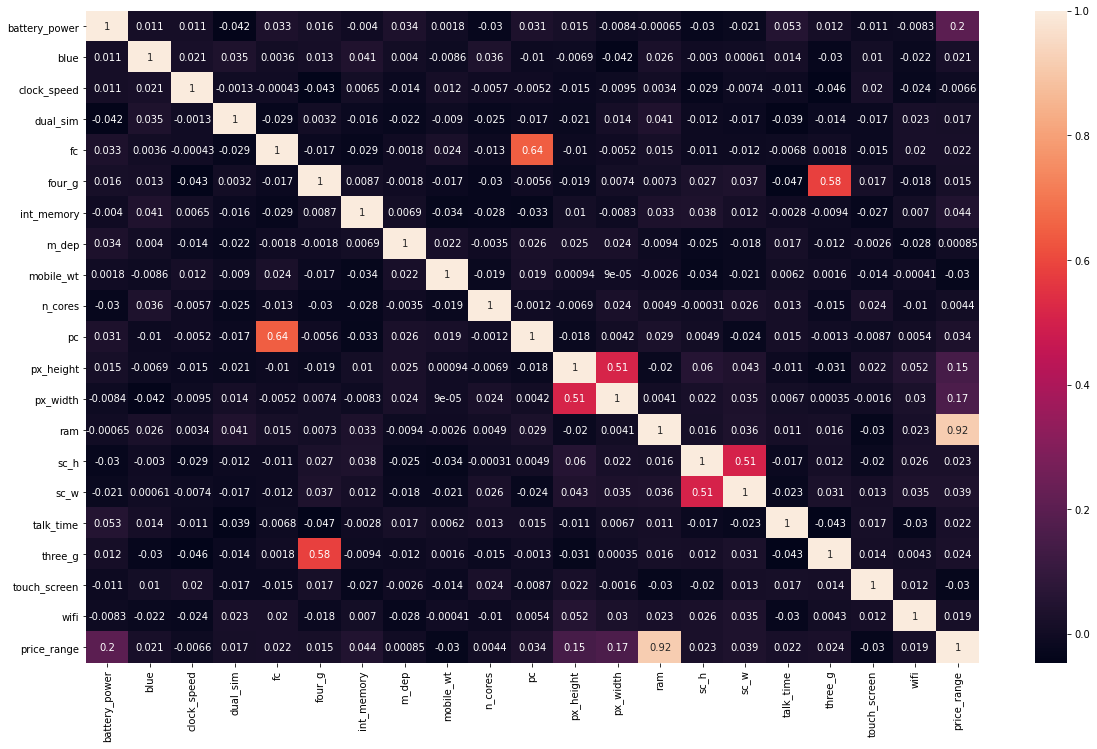

In [46]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)

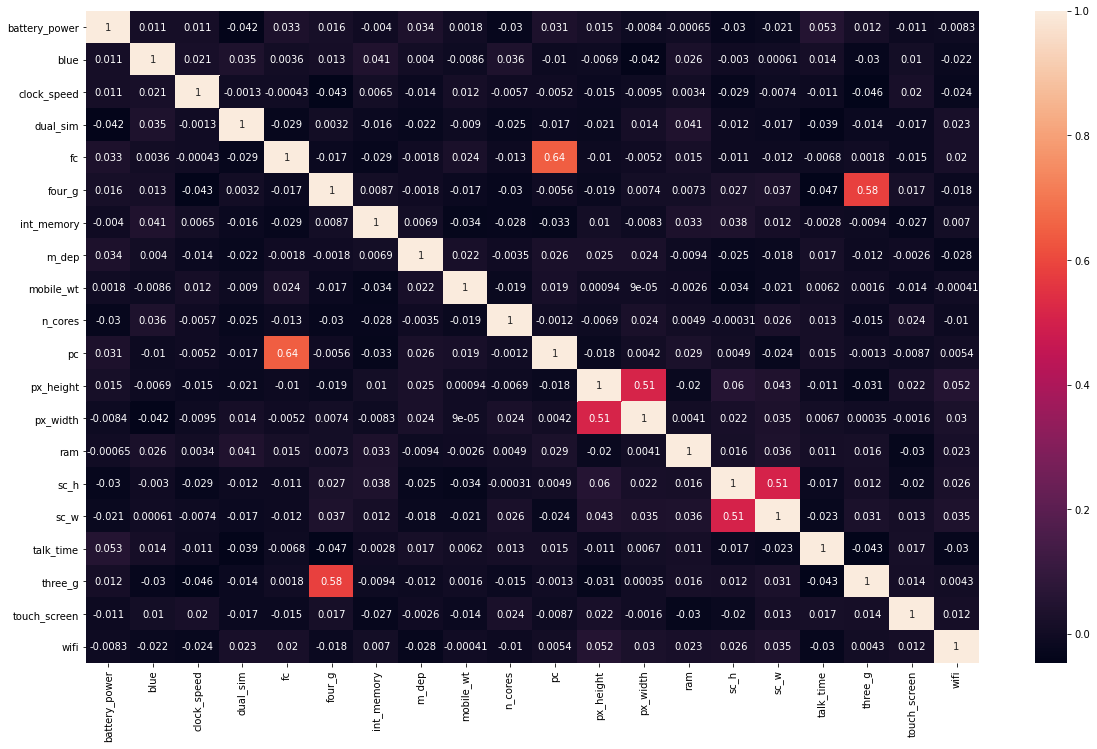

In [47]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.drop('price_range', axis=1).corr(), annot=True)

> ## Finding the correlated features

In [48]:
threshold = 0.8

In [49]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j]) > threshold:
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
correlation(df, threshold)

{'price_range'}

In [51]:
correlation(df, 0.5)

{'pc', 'price_range', 'px_width', 'sc_w', 'three_g'}

In [52]:
correlation(df.drop('price_range', axis=1), 0.5)

{'pc', 'px_width', 'sc_w', 'three_g'}

> ## 4. Mutual information or Infirmation Gain
MI between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if an donly if two random variavles are independent, and higher values mean higher dependency.

In [53]:
from sklearn.feature_selection import mutual_info_classif

In [56]:
mutual_info_values = mutual_info_classif(X_train, y_train)

In [57]:
mutual_info = pd.Series(mutual_info_values, index=X_train.columns)
mutual_info.sort_values(ascending=False)

ram              0.836898
battery_power    0.057025
four_g           0.044223
px_height        0.036205
touch_screen     0.029953
px_width         0.029581
talk_time        0.015841
dual_sim         0.012466
wifi             0.011230
three_g          0.010796
n_cores          0.009344
sc_w             0.009172
pc               0.005283
m_dep            0.002828
sc_h             0.000000
mobile_wt        0.000000
int_memory       0.000000
fc               0.000000
clock_speed      0.000000
blue             0.000000
dtype: float64